
___
# Recommender Systems with Python

Welcome to the code notebook for Recommender Systems with Python. In this lecture we will develop basic recommendation systems using Python and pandas.

In this notebook, we will focus on providing a basic recommendation system by suggesting items that are most similar to a particular item, in this case, movies. Keep in mind, this is not a true robust recommendation system, to describe it more accurately,it just tells you what movies/items are most similar to your movie choice.

There is no project for this topic, instead you have the option to work through the advanced lecture version of this notebook (totally optional!).

Let's get started!

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

## Get the Data

In [35]:
movies_df = pd.read_csv('.\\ml-latest-small\\movies.csv')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [36]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
movieId    9742 non-null int64
title      9742 non-null object
genres     9742 non-null object
dtypes: int64(1), object(2)
memory usage: 228.4+ KB


In [37]:
ratings_df = pd.read_csv('.\\ml-latest-small\\ratings.csv')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [38]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
userId       100836 non-null int64
movieId      100836 non-null int64
rating       100836 non-null float64
timestamp    100836 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


We can merge them together:

In [39]:
df = pd.merge(ratings_df, movies_df,on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


# EDA

Let's explore the data a bit and get a look at some of the best rated movies.

## Visualization Imports

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

Let's create a ratings dataframe with average rating and number of ratings:

In [41]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

In [42]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [43]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


Now set the number of ratings column:

In [44]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


Now a few histograms:

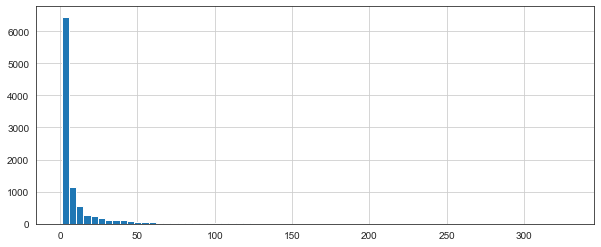

In [45]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)
plt.show()

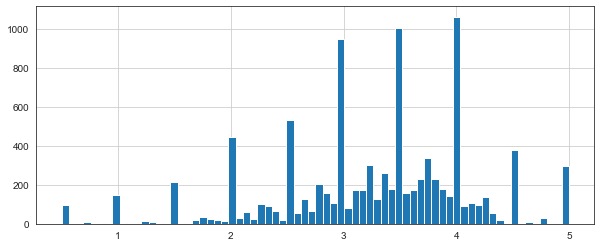

In [46]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)
plt.show()

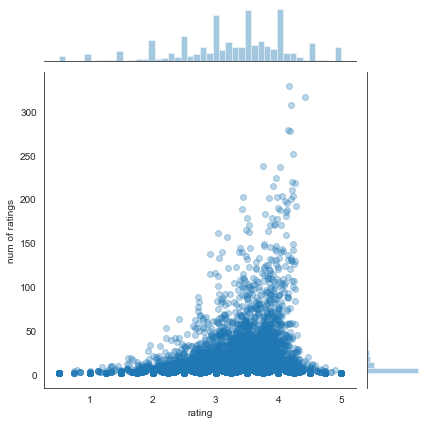

In [48]:
sns.jointplot(x='rating',y='num of ratings', data=ratings, alpha=0.3)
plt.show()

Okay! Now that we have a general idea of what the data looks like, let's move on to creating a simple recommendation system:

## Recommending Similar Movies

Now let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [49]:
moviemat = df.pivot_table(index='userId',columns='title',values='rating')
moviemat.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most rated movie:

In [50]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


Let's choose three movies: Forrest Gump, Jurassic Park and Schindler's List.

In [52]:
ratings.head()

,rating,num of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


Now let's grab the user ratings for those two movies:

In [53]:
forrest_user_ratings = moviemat['Forrest Gump (1994)']
jurassic_user_ratings = moviemat['Jurassic Park (1993)']
schindler_user_ratings = moviemat["Schindler's List (1993)"]

We can then use corrwith() method to get correlations between two pandas series:

In [54]:
similar_to_forrest = moviemat.corrwith(forrest_user_ratings)
similar_to_jurassic= moviemat.corrwith(jurassic_user_ratings)
similar_to_schindler = moviemat.corrwith(schindler_user_ratings)

C:\Users\Chaitanya\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Chaitanya\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Let's clean this by removing NaN values and using a DataFrame instead of a series:

In [55]:
corr_forrest = pd.DataFrame(similar_to_forrest, columns=['Correlation'])
corr_forrest.dropna(inplace=True)
corr_forrest.head()

,Correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000


Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie). 

In [56]:
corr_forrest.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Lost & Found (1999),1.0
"Century of the Self, The (2002)",1.0
The 5th Wave (2016),1.0
Play Time (a.k.a. Playtime) (1967),1.0
Memories (Memorîzu) (1995),1.0
Playing God (1997),1.0
Killers (2010),1.0
"Girl Walks Home Alone at Night, A (2014)",1.0
Tampopo (1985),1.0


Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).

In [58]:
corr_forrest = corr_forrest.join(ratings['num of ratings'])
corr_forrest.head()

,Correlation,num of ratings
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2


Now sort the values and notice how the titles make a lot more sense:

In [64]:
corr_forrest[corr_forrest['num of ratings']>100].sort_values('Correlation',ascending=False).head(10)

,Correlation,num of ratings
title,,
Forrest Gump (1994),1.000000,329
Good Will Hunting (1997),0.484042,141
Aladdin (1992),0.464268,183
American History X (1998),0.457287,129
"Truman Show, The (1998)",0.432556,125
Braveheart (1995),0.416976,237
Ferris Bueller's Day Off (1986),0.405830,109
Mrs. Doubtfire (1993),0.401408,144
Full Metal Jacket (1987),0.397241,102


Now the same for the comedy Liar Liar:

In [63]:
corr_jurassic = pd.DataFrame(similar_to_jurassic,columns=['Correlation'])
corr_jurassic.dropna(inplace=True)
corr_jurassic = corr_jurassic.join(ratings['num of ratings'])
corr_jurassic[corr_jurassic['num of ratings']>100].sort_values('Correlation',ascending=False).head(10)

,Correlation,num of ratings
title,,
Jurassic Park (1993),1.000000,238
Outbreak (1995),0.533780,101
Ghostbusters (a.k.a. Ghost Busters) (1984),0.522286,120
"Fugitive, The (1993)",0.460603,190
Indiana Jones and the Temple of Doom (1984),0.456533,108
Mission: Impossible (1996),0.451929,162
Die Hard (1988),0.451241,145
X-Men (2000),0.448910,133
Twister (1996),0.440167,123


In [62]:
corr_schindler = pd.DataFrame(similar_to_schindler,columns=['Correlation'])
corr_schindler.dropna(inplace=True)
corr_schindler = corr_schindler.join(ratings['num of ratings'])
corr_schindler[corr_schindler['num of ratings']>100].sort_values('Correlation',ascending=False).head(10)

,Correlation,num of ratings
title,,
Schindler's List (1993),1.000000,220
"Godfather, The (1972)",0.456661,192
Saving Private Ryan (1998),0.430103,188
"Shawshank Redemption, The (1994)",0.402202,317
"Godfather: Part II, The (1974)",0.402173,129
Apocalypse Now (1979),0.378506,107
Fight Club (1999),0.360462,218
Star Wars: Episode VI - Return of the Jedi (1983),0.358350,196
Star Wars: Episode V - The Empire Strikes Back (1980),0.342097,211
